In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [5]:
class SobelFilter(nn.Module):
    # initialization
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(1,1,(3,3),bias=False,padding=1)
    # forward
    def forward(self, x):
        return self.conv(x)

In [6]:
model = SobelFilter()
layers = [layer for layer in model.parameters()]
print(len(layers))
print(layers[0].data)

1
tensor([[[[-0.1131, -0.3185, -0.0650],
          [ 0.1107,  0.2543,  0.0136],
          [-0.0128,  0.1585,  0.0930]]]])


In [7]:
w = torch.tensor([[[
    [ -1.,  0.,  1.],
    [ -2.,  0.,  2.],
    [ -1.,  0.,  1.]
    ]]])

In [9]:
w

tensor([[[[-1.,  0.,  1.],
          [-2.,  0.,  2.],
          [-1.,  0.,  1.]]]])

In [10]:
layers[0].data = w
print(layers[0].data)

tensor([[[[-1.,  0.,  1.],
          [-2.,  0.,  2.],
          [-1.,  0.,  1.]]]])


In [11]:
input_images = torch.tensor([[[
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    ]]],dtype=torch.float)

In [12]:
output_images = model(input_images)
print(output_images[0])

tensor([[[ 3.,  0.,  0.,  0., -3.],
         [ 4.,  0.,  0.,  0., -4.],
         [ 4.,  0.,  0.,  0., -4.],
         [ 4.,  0.,  0.,  0., -4.],
         [ 3.,  0.,  0.,  0., -3.]]], grad_fn=<SelectBackward0>)


In [13]:
input_images = torch.tensor([[[
    [1,1,0,0,0],
    [1,1,0,0,0],
    [1,1,0,0,0],
    [1,1,0,0,0],
    [1,1,0,0,0]
    ]]],dtype=torch.float)

In [14]:
output_images = model(input_images)
print(output_images[0])

tensor([[[ 3., -3., -3.,  0.,  0.],
         [ 4., -4., -4.,  0.,  0.],
         [ 4., -4., -4.,  0.,  0.],
         [ 4., -4., -4.,  0.,  0.],
         [ 3., -3., -3.,  0.,  0.]]], grad_fn=<SelectBackward0>)


--2025-10-29 15:18:15--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91814 (90K) [image/jpeg]
Saving to: ‘lena.jpg’

lena.jpg            100%[===================>]  89.66K  --.-KB/s    in 0.009s  

2025-10-29 15:18:15 (9.68 MB/s) - ‘lena.jpg’ saved [91814/91814]



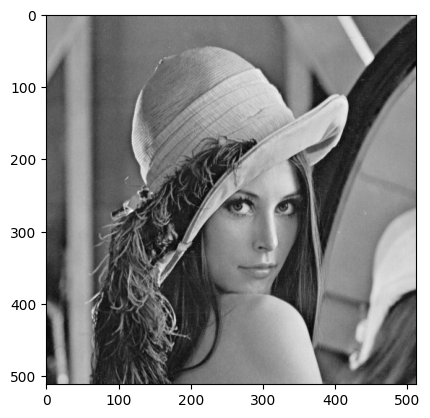

In [15]:
!test -f lena.jpg || wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg
image = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()

In [16]:
image.shape
rows,cols = image.shape

In [17]:
input_image = torch.from_numpy(image)
input_image = input_image.unsqueeze(0).float()
input_images = input_image.unsqueeze(0)
input_images.shape

torch.Size([1, 1, 512, 512])

In [18]:
output_images = model(input_images)

In [19]:
output_image = output_images[0]
output_image = output_image.squeeze(0)
output_image = output_image.detach().numpy()
print(output_image.shape)
print(np.amax(output_image))
print(np.amin(output_image))

(512, 512)
689.0
-858.0


In [20]:
np.savetxt('lena-sobel.txt', output_image, fmt='%f')

In [21]:
output_image = abs(output_image);
output_image = cv2.normalize(output_image,None,0,255,cv2.NORM_MINMAX)
output_image = np.uint8(output_image)
cv2.imwrite('lena-sobel.jpg',output_image)

True

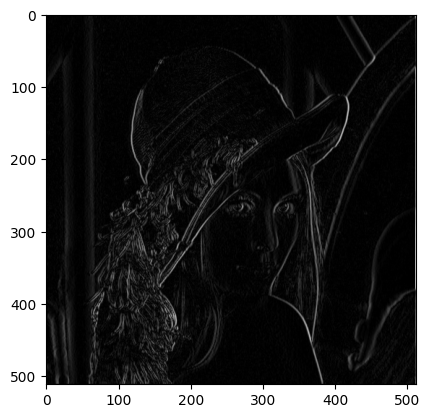

In [22]:
plt.imshow(output_image, cmap='gray')
plt.show()

In [23]:
from google.colab import files
files.download('lena-sobel.txt')
files.download('lena-sobel.jpg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>